In [133]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

np.random.seed(19680801)

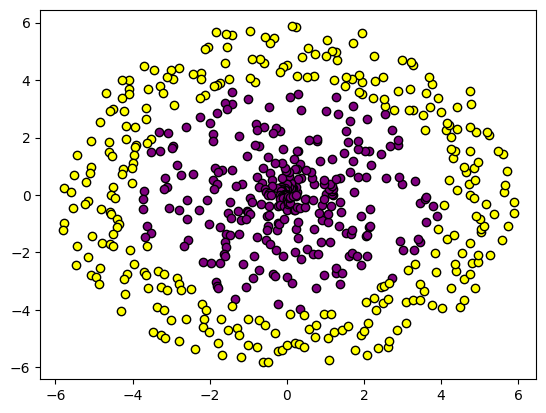

In [134]:
t=np.linspace(0,2*np.pi,300,endpoint=False)
r=np.random.uniform([[4],[6]],[[0],[4]], size=(2,300))
inner=[r[0]*np.cos(t),r[0]*np.sin(t)]
outer=[r[1]*np.cos(t),r[1]*np.sin(t)]

plt.scatter(inner[0],inner[1],c="purple",edgecolor='k')
plt.scatter(outer[0],outer[1],c="yellow",edgecolor='k')

In [135]:
a=np.array(inner[0]).reshape(-1,1)
b=np.array(inner[1]).reshape(-1,1)
newInner=np.concatenate((a,b,2*(a**2) + 2*(b**2)),axis=1)

c=np.array(outer[0]).reshape(-1,1)
d=np.array(outer[1]).reshape(-1,1)

newOuter=np.concatenate((c,d,2*(c**2) + 2*(d**2)),axis=1)
data=np.concatenate((newInner,newOuter))
y=np.concatenate((np.zeros(len(newInner)),np.ones(len(newOuter))))


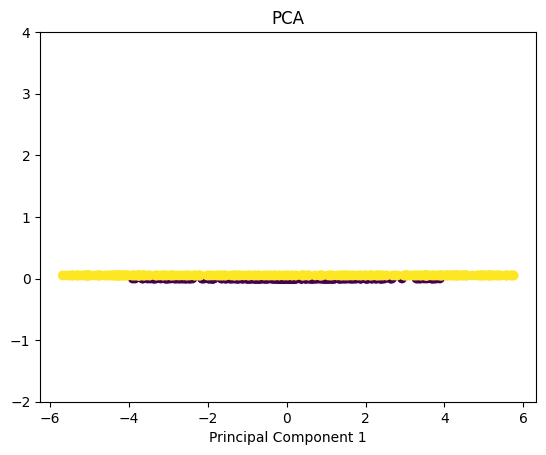

In [136]:
pca = PCA(n_components=1)
n=np.concatenate((a,b),axis=1)
m=np.concatenate((c,d),axis=1)
nm=np.concatenate((n,m))
X_pca = pca.fit_transform(nm)
 
# Plot the results
plt.scatter(X_pca[:, 0], [[0.0]*len(n)+[0.05]*len(m)] ,c=y )
plt.ylim(-2,4)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.show()

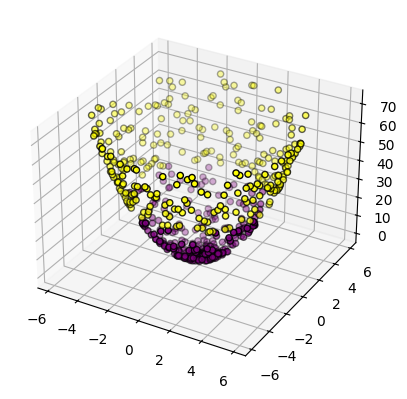

In [137]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(inner[0],inner[1],2*(inner[0]**2) + 2*(inner[1]**2),c="purple",edgecolor='k')
ax.scatter(outer[0],outer[1],2*(outer[0]**2) + 2*(outer[1]**2),c='yellow',edgecolor='k')

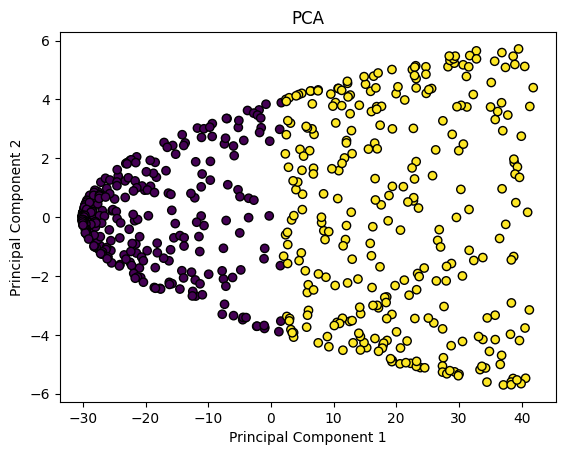

In [138]:

# Apply PCA with two components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
 
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

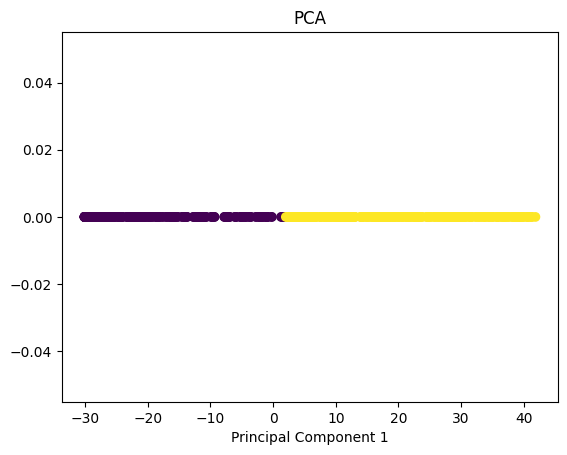

In [139]:
# Apply PCA with one components (visualization)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(data)
 
# Plot the results
plt.scatter(X_pca[:, 0], np.zeros(len(X_pca[:, 0])) ,c=y )
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.show()

In [140]:
pdist([[1,2,3],
 [4,5,6],
 [7,8,9]],'sqeuclidean')

array([ 27., 108.,  27.])

In [141]:
M=pdist(data, 'sqeuclidean')
M=squareform(M)

In [142]:
def gaus_kpca(X, gamma, n_components):

    # Computes the squared Euclidean distance between the points in the matrix.
    # Converting the pairwise distances into a symmetric nXn matrix.
    mat_sq_dists = squareform(pdist(X, 'sqeuclidean'))

    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues and eigenvectors from the symmetric matrix.
    eigvals, eigvectors = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvectors[:,-i] for i in range(1,n_components+1)))

    return X_pc

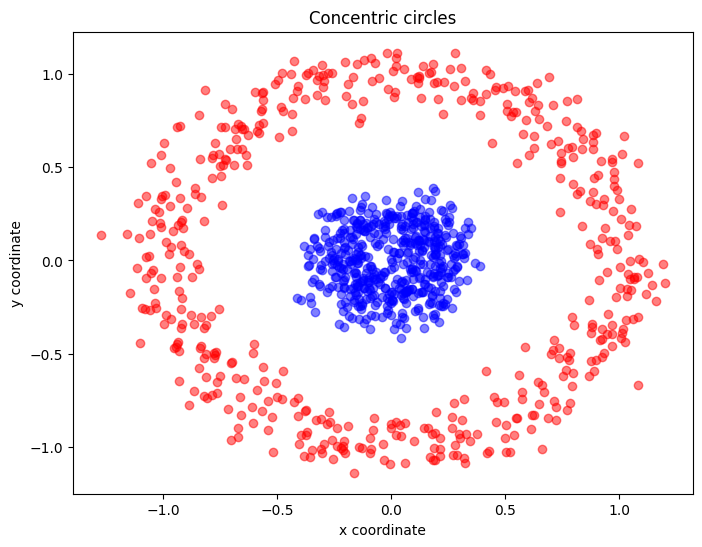

In [143]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

In [147]:
samples1=np.concatenate((a,b),axis=1)
samples2=np.concatenate((c,d),axis=1)
samples=np.concatenate((samples1,samples2))

array([[ 1.19853078,  0.        ],
       [ 1.02877109,  0.02154968],
       [ 1.16185991,  0.04869636],
       ...,
       [ 5.15370411, -0.32424358],
       [ 5.88346863, -0.2465904 ],
       [ 4.86041728, -0.10181123]])

In [148]:
X_pc = gaus_kpca(samples, gamma=15, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

TypeError: arrays to stack must be passed as a "sequence" type such as list or tuple.